# 多层感知机

In [1]:
import torch
from d2l import torch as d2l

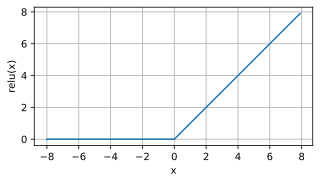

In [9]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

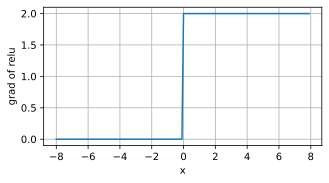

In [13]:
y.sum().backward()
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

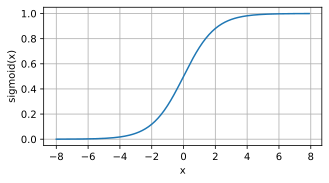

In [14]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

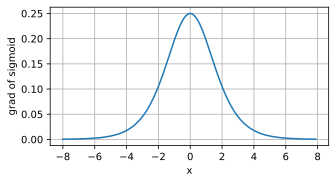

In [15]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

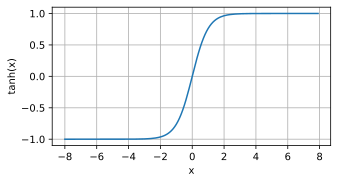

In [16]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

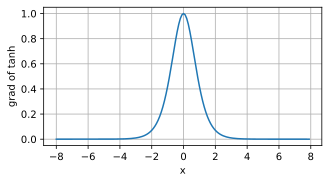

In [17]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

# 多层感知机的从零开始实现

In [18]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [19]:
# 设定每层数量
num_inputs, num_outputs, num_hiddens = 784, 10, 256

# 定义每层参数
W1 = nn.Parameter(
    torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01
)
b1 = nn.Parameter(
    torch.zeros(num_hiddens, requires_grad=True)
)
W2 = nn.Parameter(
    torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01
)
b2 = nn.Parameter(
    torch.zeros(num_outputs, requires_grad=True)
)

params = [W1, b1, W2, b2]

In [20]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [21]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

In [23]:
loss = nn.CrossEntropyLoss(reduction='none')

In [24]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

AttributeError: module 'd2l.torch' has no attribute 'train_ch3'

# 多层感知机的简单实现

In [20]:
import torch
from torch import nn
from d2l import torch as d2l

In [21]:
# 定义模型
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 10),
    nn.Softmax(dim=1)  # Softmax层用于多分类问题
)

# 初始化参数
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
  (4): Softmax(dim=1)
)

epoch 1, loss 0.0089, train acc 0.1936, test acc 0.2909
epoch 2, loss 0.0079, train acc 0.5143, test acc 0.6212
epoch 3, loss 0.0073, train acc 0.6265, test acc 0.6293
epoch 4, loss 0.0072, train acc 0.6384, test acc 0.6522
epoch 5, loss 0.0071, train acc 0.6782, test acc 0.6925
epoch 6, loss 0.0070, train acc 0.7049, test acc 0.7086
epoch 7, loss 0.0069, train acc 0.7159, test acc 0.7144
epoch 8, loss 0.0069, train acc 0.7220, test acc 0.7192
epoch 9, loss 0.0069, train acc 0.7256, test acc 0.7240
epoch 10, loss 0.0068, train acc 0.7289, test acc 0.7268


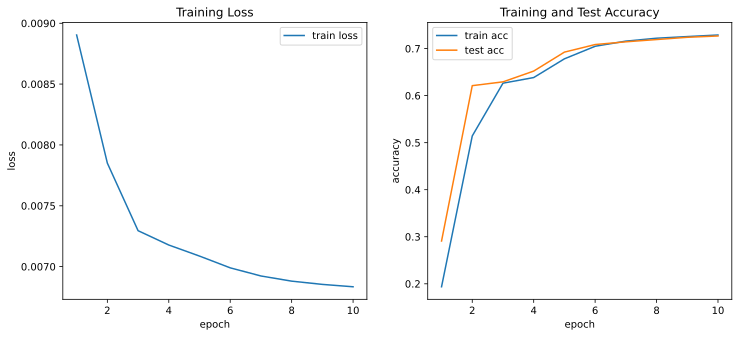

In [ ]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

def accuracy(y_hat, y):  #@save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

def train(net, train_iter, test_iter, loss, num_epochs, trainer):
    # 定义列表来存储训练和测试的损失和准确率
    train_loss, train_acc, test_acc = [], [], []
  
    # 训练循环
    for epoch in range(num_epochs):
      train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
      for X, y in train_iter:
          y_hat = net(X)
          # 梯度清零
          trainer.zero_grad()
          # 计算损失
          l = loss(y_hat, y).mean()
          # 反向传播
          l.backward()
          # 更新参数
          trainer.step()
          # 计算训练损失和准确率
          train_l_sum += l.item()
          train_acc_sum += accuracy(y_hat, y)
          n += y.shape[0]
      # 计算平均损失和准确率
      train_loss.append(train_l_sum / n)
      train_acc.append(train_acc_sum / n)

      # 计算测试集准确率
      test_acc_sum, n = 0.0, 0
      with torch.no_grad():
          for X, y in test_iter:
              y_hat = net(X)
              test_acc_sum += accuracy(y_hat, y)
              n += y.shape[0]
      test_acc.append(test_acc_sum / n)

      # 打印结果
      print(f'epoch {epoch + 1}, loss {train_loss[-1]:.4f}, '
            f'train acc {train_acc[-1]:.4f}, test acc {test_acc[-1]:.4f}')
    
    # 绘图
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_loss, label='train loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Training Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_acc, label='train acc')
    plt.plot(range(1, num_epochs + 1), test_acc, label='test acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Training and Test Accuracy')
    plt.legend()
    
    plt.show()

    # 返回训练和测试的损失和准确率
    return train_loss, train_acc, test_acc

# 训练模型
train_loss, train_acc, test_acc = train(net, train_iter, test_iter, loss, num_epochs, trainer)

# epoch 1, loss 0.0089, train acc 0.1936, test acc 0.2909
# epoch 2, loss 0.0079, train acc 0.5143, test acc 0.6212
# epoch 3, loss 0.0073, train acc 0.6265, test acc 0.6293
# epoch 4, loss 0.0072, train acc 0.6384, test acc 0.6522
# epoch 5, loss 0.0071, train acc 0.6782, test acc 0.6925
# epoch 6, loss 0.0070, train acc 0.7049, test acc 0.7086
# epoch 7, loss 0.0069, train acc 0.7159, test acc 0.7144
# epoch 8, loss 0.0069, train acc 0.7220, test acc 0.7192
# epoch 9, loss 0.0069, train acc 0.7256, test acc 0.7240
# epoch 10, loss 0.0068, train acc 0.7289, test acc 0.7268

In [28]:
num_epoch = 10
for i in range(num_epoch):
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y).mean()
        trainer.zero_grad()
        l.backward()
        trainer.step()
        print(f'epoch {i + 1}, loss {l:f}')

epoch 1, loss 2.301277
epoch 1, loss 2.298658
epoch 1, loss 2.293177
epoch 1, loss 2.286086
epoch 1, loss 2.280468
epoch 1, loss 2.274066
epoch 1, loss 2.270013
epoch 1, loss 2.261670
epoch 1, loss 2.250161
epoch 1, loss 2.240827
epoch 1, loss 2.218532
epoch 1, loss 2.220828
epoch 1, loss 2.201534
epoch 1, loss 2.187340
epoch 1, loss 2.167377
epoch 1, loss 2.150893
epoch 1, loss 2.122252
epoch 1, loss 2.098696
epoch 1, loss 2.076605
epoch 1, loss 2.052999
epoch 1, loss 2.023009
epoch 1, loss 1.980447
epoch 1, loss 1.958243
epoch 1, loss 1.904979
epoch 1, loss 1.890700
epoch 1, loss 1.824888
epoch 1, loss 1.790959
epoch 1, loss 1.757482
epoch 1, loss 1.686769
epoch 1, loss 1.751453
epoch 1, loss 1.668849
epoch 1, loss 1.646729
epoch 1, loss 1.631237
epoch 1, loss 1.579693
epoch 1, loss 1.549704
epoch 1, loss 1.481212
epoch 1, loss 1.503832
epoch 1, loss 1.450637
epoch 1, loss 1.424267
epoch 1, loss 1.489666
epoch 1, loss 1.377784
epoch 1, loss 1.429331
epoch 1, loss 1.360681
epoch 1, lo

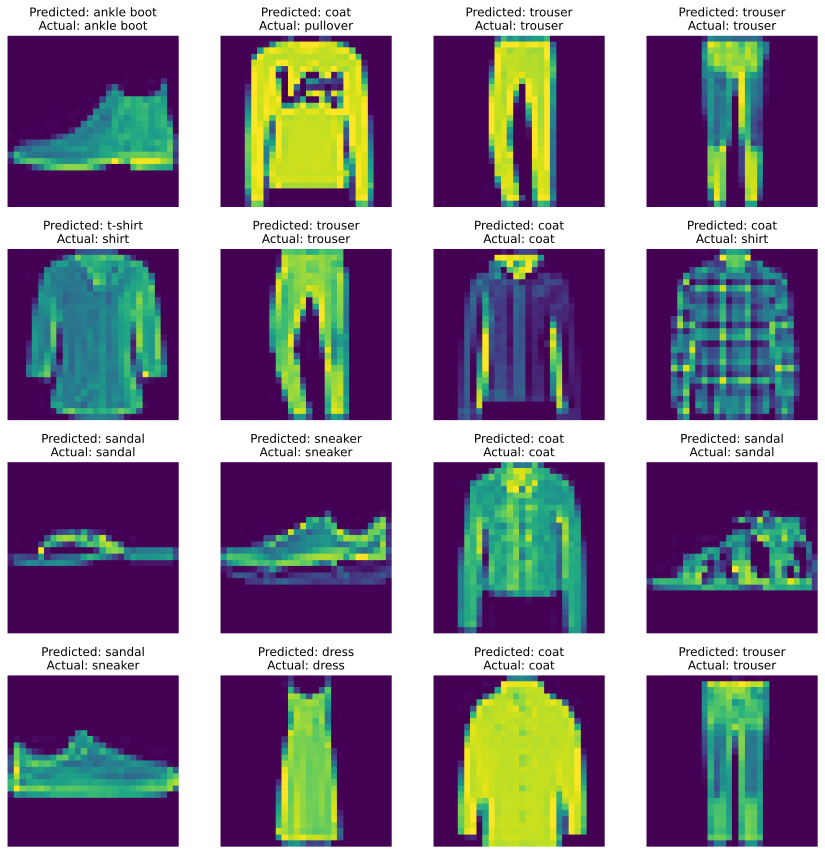

In [28]:
# 实现预测函数，将模型的输出转换为标签，每幅图的标题为预测+实际标签
def predict(net, test_iter):
    # 获取测试集的第一批数据
    for X, y in test_iter:
        break
    
    # 将数据传入模型进行预测
    y_hat = net(X)
    y_hat = y_hat.argmax(axis=1)

    # 将预测结果和实际标签转换为numpy数组
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    
    # 使用plt原生实现
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 12))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(X[i].reshape(28, 28))
        plt.title(f'Predicted: {text_labels[y_hat[i]]}\nActual: {text_labels[y[i]]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

predict(net, test_iter)

# 模型选择、欠拟合和过拟合

In [29]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [30]:
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [31]:
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.2944],
         [-0.8659]]),
 tensor([[ 1.0000e+00, -2.9437e-01,  4.3326e-02, -4.2513e-03,  3.1286e-04,
          -1.8419e-05,  9.0368e-07, -3.8002e-08,  1.3983e-09, -4.5736e-11,
           1.3463e-12, -3.6029e-14,  8.8381e-16, -2.0013e-17,  4.2080e-19,
          -8.2580e-21,  1.5193e-22, -2.6308e-24,  4.3023e-26, -6.6657e-28],
         [ 1.0000e+00, -8.6594e-01,  3.7492e-01, -1.0822e-01,  2.3428e-02,
          -4.0575e-03,  5.8558e-04, -7.2440e-05,  7.8411e-06, -7.5443e-07,
           6.5329e-08, -5.1428e-09,  3.7111e-10, -2.4720e-11,  1.5290e-12,
          -8.8269e-14,  4.7772e-15, -2.4334e-16,  1.1706e-17, -5.3353e-19]]),
 tensor([4.6261, 2.2149]))

In [32]:
def evaluate_loss(net, data_iter, loss):  #@save
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [33]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

AttributeError: module 'd2l.torch' has no attribute 'train_epoch_ch3'

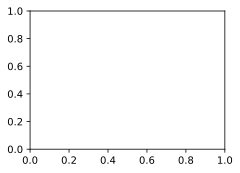

In [34]:
# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

AttributeError: module 'd2l.torch' has no attribute 'train_epoch_ch3'

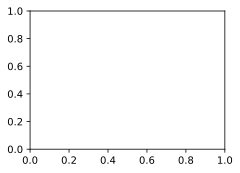

In [35]:
# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

AttributeError: module 'd2l.torch' has no attribute 'train_epoch_ch3'

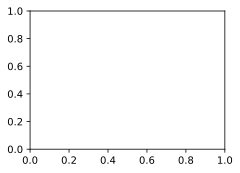

In [36]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

# 权重衰减

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [3]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [4]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [5]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

w的L2范数是： 13.969493865966797


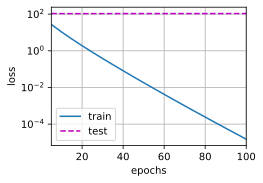

In [6]:
train(lambd=0)

w的L2范数是： 0.3932396471500397


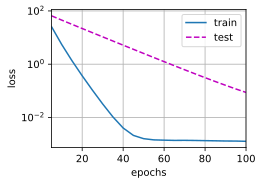

In [7]:
train(lambd=3)

# w的L2范数是： 0.3998390734195709

In [8]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 13.473162651062012


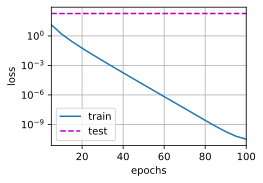

In [9]:
train_concise(0)

# w的L2范数： 12.603312492370605

w的L2范数： 0.3867378532886505


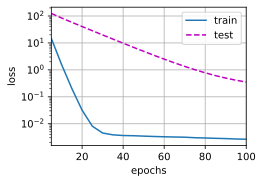

In [10]:
train_concise(3)

In [11]:
net = nn.Sequential(nn.Linear(num_inputs, 1))

In [12]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[ 0.0295,  0.0504,  0.0663,  0.0637, -0.0441, -0.0548, -0.0013, -0.0486,
          0.0580,  0.0657, -0.0263,  0.0621,  0.0301, -0.0008,  0.0473, -0.0157,
         -0.0496,  0.0194,  0.0102,  0.0224, -0.0503,  0.0354,  0.0533, -0.0189,
         -0.0588,  0.0557,  0.0433, -0.0299,  0.0071,  0.0508, -0.0101, -0.0252,
         -0.0582, -0.0305, -0.0523, -0.0520,  0.0170,  0.0163,  0.0611, -0.0425,
          0.0656,  0.0082, -0.0345,  0.0421, -0.0689,  0.0308, -0.0550,  0.0431,
         -0.0472,  0.0696, -0.0498,  0.0400,  0.0131, -0.0338,  0.0478,  0.0185,
         -0.0135,  0.0290,  0.0234,  0.0340,  0.0315,  0.0685,  0.0585,  0.0203,
          0.0057,  0.0222,  0.0102,  0.0192, -0.0036,  0.0218,  0.0067, -0.0400,
          0.0471,  0.0198, -0.0126,  0.0010,  0.0362, -0.0341,  0.0517, -0.0190,
          0.0515,  0.0571, -0.0149, -0.0485,  0.0487, -0.0205, -0.0265,  0.0295,
          0.0484, -0.0120,  0.0133, -0.0460, -0.0020,  0.0493,  0.0636, -0.0078,
      

In [ ]:
# 手动实现


# 定义模型
net = nn.Sequential(nn.Linear(num_inputs, 1))

# 初始化模型参数
for param in net.parameters():
    param.data.normal_()

# 定义损失函数
loss = nn.MSELoss(reduction='none')

# 定义优化器
lr = 0.003
trainer = torch.optim.SGD(
    [
        {"params": net[0].weight, 'weight_decay': 3},  # L2范数惩罚
        {"params": net[0].bias}  # 偏置参数没有衰减
    ],
    lr=lr
)

# 训练模型


epoch 1, loss 340.873352
epoch 2, loss 129.885223
epoch 3, loss 108.922302
epoch 4, loss 49.936359
epoch 5, loss 36.275150
epoch 6, loss 5.584095
epoch 7, loss 8.749542
epoch 8, loss 5.919023
epoch 9, loss 1.238528
epoch 10, loss 3.112126
w的L2范数： 8.771432876586914


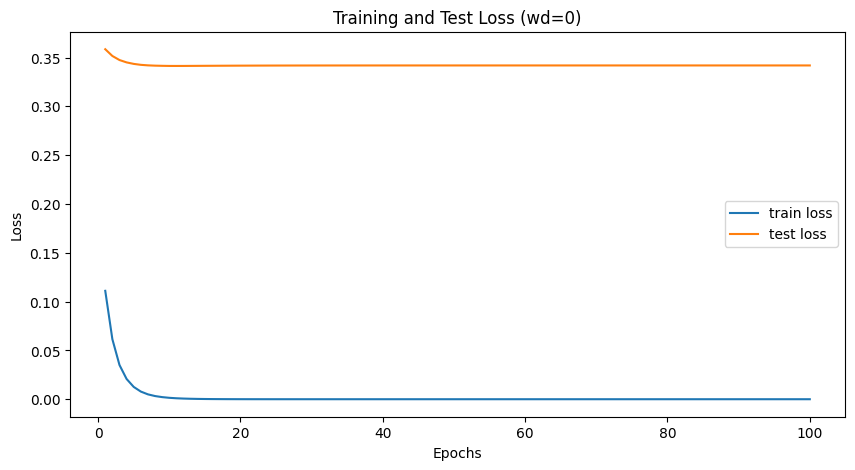

w的L2范数： 0.5749825835227966


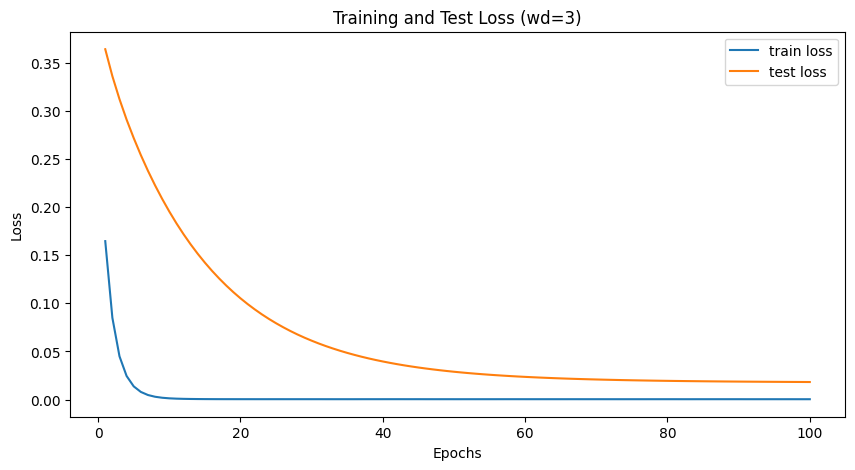

w的L2范数： 0.04480176046490669
over!


In [8]:
# 加载必要的库
import torch
from torch import nn

# 定义随机种子以确保结果可复现
torch.manual_seed(123)

# 定义辅助函数用以生成合成数据
def synthetic_data(w, b, num_examples):
    """生成线性回归的合成数据"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

# 定义辅助函数用以加载数据
def load_array(data_arrays, batch_size, is_train=True):
    """构造一个PyTorch数据迭代器"""
    dataset = torch.utils.data.TensorDataset(*data_arrays)
    return torch.utils.data.DataLoader(dataset, batch_size, shuffle=is_train)

# 生成数据并加载数据
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = synthetic_data(true_w, true_b, n_train)
train_iter = load_array(train_data, batch_size)
test_data = synthetic_data(true_w, true_b, n_test)
test_iter = load_array(test_data, batch_size, is_train=False)

# 定义辅助函数用于计算损失函数
def cal_loss(net, iter, loss):
    """计算给定数据集上模型的损失"""
    loss_sum, n = 0.0, 0
    with torch.no_grad():
        for X, y in iter:
            out = net(X)
            y = y.reshape(out.shape)
            l = loss(out, y)
            loss_sum += l.sum().item()
            n += l.numel()
    return loss_sum / n

# 定义训练函数
def train_concise(wd, num_epochs=100, lr=0.003):
    # 定义模型
    net = nn.Sequential(nn.Linear(num_inputs, 1))

    # 初始化模型参数
    for param in net.parameters():
        if isinstance(param, nn.Linear):
            param.data.normal_()
    
    # 定义损失函数
    loss = nn.MSELoss(reduction='none')

    # 定义优化器
    trainer = torch.optim.SGD(
        [
            {"params": net[0].weight, "weight_decay": wd},  # L2范数惩罚
            {"params": net[0].bias}
        ],
        lr=lr
    )

    # 存储训练和测试的损失
    test_loss, train_loss = [], []

    # 训练模型
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        train_loss.append(cal_loss(net, train_iter, loss))
        test_loss.append(cal_loss(net, test_iter, loss))
    
    # 绘制训练和测试损失曲线
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), train_loss, label='train loss')
    plt.plot(range(1, num_epochs + 1), test_loss, label='test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Test Loss (wd={wd})')
    plt.legend()
    plt.show()

    # 输出w的L2范数
    print('w的L2范数：', net[0].weight.norm().item())

    # 返回训练和测试的损失
    return train_loss, test_loss

# 训练模型并绘制损失曲线
train_concise(0)

train_concise(3)

print("over!")

# 暂退法

In [9]:
import torch
from torch import nn
from d2l import torch as d2l


def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [ ]:
X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

# tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
#         [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
# tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
#         [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
# tensor([[ 0.,  0.,  4.,  0.,  8., 10.,  0.,  0.],
#         [16., 18., 20.,  0., 24.,  0.,  0.,  0.]])
# tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
#         [0., 0., 0., 0., 0., 0., 0., 0.]])

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  0.,  4.,  0.,  8., 10.,  0.,  0.],
        [16., 18., 20.,  0., 24.,  0.,  0.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [11]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

In [12]:
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

In [13]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

AttributeError: module 'd2l.torch' has no attribute 'train_ch3'

epoch 1, loss 0.0089, train acc 0.1368, test acc 0.3827
epoch 2, loss 0.0074, train acc 0.5765, test acc 0.6577
epoch 3, loss 0.0070, train acc 0.6940, test acc 0.6946
epoch 4, loss 0.0069, train acc 0.7126, test acc 0.7072
epoch 5, loss 0.0068, train acc 0.7215, test acc 0.7199
epoch 6, loss 0.0068, train acc 0.7289, test acc 0.7141
epoch 7, loss 0.0068, train acc 0.7341, test acc 0.7307
epoch 8, loss 0.0068, train acc 0.7372, test acc 0.7319
epoch 9, loss 0.0067, train acc 0.7407, test acc 0.6980
epoch 10, loss 0.0067, train acc 0.7423, test acc 0.7328


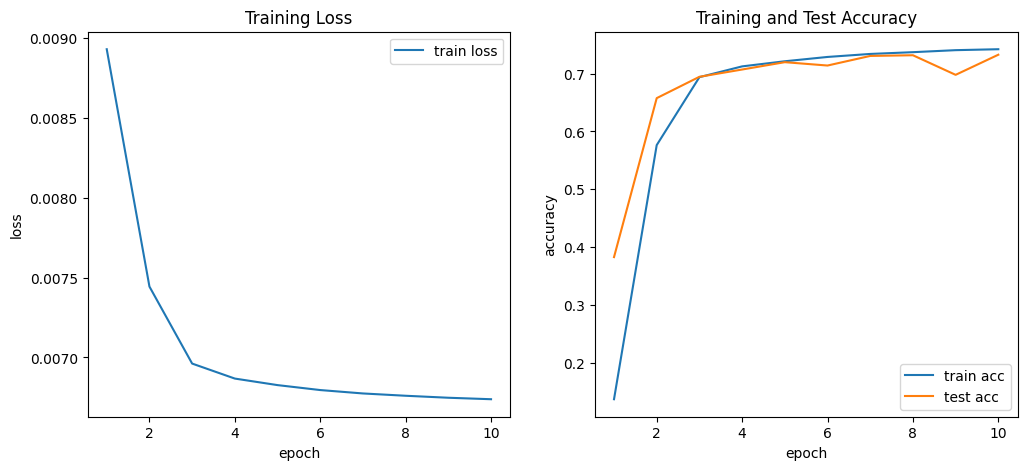

In [1]:
# 加载必要的库
import torch
from torch import nn
import torchvision

# 设置随机种子以确保结果可复现
torch.manual_seed(123)

# 定义参数
batch_size, lr, num_epochs = 256, 0.5, 10
dropout1, dropout2 = 0.2, 0.5

# 加载数据集
train_data = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True,
    transform=torchvision.transforms.ToTensor()
)
test_data = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True,
    transform=torchvision.transforms.ToTensor()
)
train_iter = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, shuffle=True
)
test_iter = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size, shuffle=False
)

# 定义模型
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    # 在第一个全连接层之后添加一个dropout层
    nn.Dropout(dropout1),
    nn.Linear(256, 256),
    nn.ReLU(),
    # 在第二个全连接层之后添加一个dropout层
    nn.Dropout(dropout2),
    nn.Linear(256, 10),
    nn.Softmax(dim=1)  # Softmax层用于多分类问题
)

# 初始化参数
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights)

# 定义损失函数
loss = nn.CrossEntropyLoss(reduction='none')

# 定义优化器
trainer = torch.optim.SGD(net.parameters(), lr=lr)

# 定义训练函数
def accuracy(y_hat, y):  #@save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

def train(net, train_iter, test_iter, loss, num_epochs, trainer):
    # 定义列表来存储训练和测试的损失和准确率
    train_loss, train_acc, test_acc = [], [], []

    # 仅在训练模式下使用dropout
    # 仅在训练模式下使用dropout
    # 仅在训练模式下使用dropout
    net.train()
  
    # 训练循环
    for epoch in range(num_epochs):
      train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
      for X, y in train_iter:
          y_hat = net(X)
          # 梯度清零
          trainer.zero_grad()
          # 计算损失
          l = loss(y_hat, y).mean()
          # 反向传播
          l.backward()
          # 更新参数
          trainer.step()
          # 计算训练损失和准确率
          train_l_sum += l.item()
          train_acc_sum += accuracy(y_hat, y)
          n += y.shape[0]
      # 计算平均损失和准确率
      train_loss.append(train_l_sum / n)
      train_acc.append(train_acc_sum / n)

      # 计算测试集准确率
      test_acc_sum, n = 0.0, 0
      with torch.no_grad():
          for X, y in test_iter:
              y_hat = net(X)
              test_acc_sum += accuracy(y_hat, y)
              n += y.shape[0]
      test_acc.append(test_acc_sum / n)

      # 打印结果
      print(f'epoch {epoch + 1}, loss {train_loss[-1]:.4f}, '
            f'train acc {train_acc[-1]:.4f}, test acc {test_acc[-1]:.4f}')
    
    # 绘图
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_loss, label='train loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Training Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_acc, label='train acc')
    plt.plot(range(1, num_epochs + 1), test_acc, label='test acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Training and Test Accuracy')
    plt.legend()
    
    plt.show()

    # 返回训练和测试的损失和准确率
    return train_loss, train_acc, test_acc

# 训练模型
train_loss, train_acc, test_acc = train(net, train_iter, test_iter, loss, num_epochs, trainer)

# 数值稳定性和模型初始化

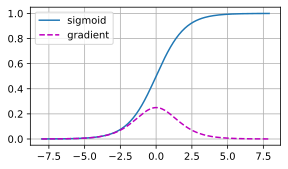

In [2]:
%matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

In [ ]:
M = torch.normal(0, 1, size=(4,4))
print('一个矩阵 \n',M)
for i in range(100):
    M = torch.mm(M,torch.normal(0, 1, size=(4, 4)))

print('乘以100个矩阵后\n', M)

# 一个矩阵 
#  tensor([[ 0.1619,  2.1262, -2.2325,  1.8276],
#         [ 0.9325, -1.9848, -0.8166, -0.2301],
#         [-0.8302, -1.2581, -0.8229,  0.1264],
#         [-1.2049,  0.1164, -0.6737,  0.9988]])
# 乘以100个矩阵后
#  tensor([[ 8.7884e+23, -2.6251e+22, -2.5097e+23, -2.9231e+23],
#         [-6.9989e+23,  2.0906e+22,  1.9987e+23,  2.3279e+23],
#         [ 9.6789e+22, -2.8911e+21, -2.7640e+22, -3.2192e+22],
#         [ 6.2576e+23, -1.8692e+22, -1.7870e+23, -2.0813e+23]])

一个矩阵 
 tensor([[ 0.1619,  2.1262, -2.2325,  1.8276],
        [ 0.9325, -1.9848, -0.8166, -0.2301],
        [-0.8302, -1.2581, -0.8229,  0.1264],
        [-1.2049,  0.1164, -0.6737,  0.9988]])
乘以100个矩阵后
 tensor([[ 8.7884e+23, -2.6251e+22, -2.5097e+23, -2.9231e+23],
        [-6.9989e+23,  2.0906e+22,  1.9987e+23,  2.3279e+23],
        [ 9.6789e+22, -2.8911e+21, -2.7640e+22, -3.2192e+22],
        [ 6.2576e+23, -1.8692e+22, -1.7870e+23, -2.0813e+23]])


# kaggle实战

In [4]:
import hashlib
import os
import tarfile
import zipfile
import requests

#@save
DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'

In [5]:
def download(name, cache_dir=os.path.join('..', 'data')):  #@save
    """下载一个DATA_HUB中的文件，返回本地文件名"""
    assert name in DATA_HUB, f"{name} 不存在于 {DATA_HUB}"
    url, sha1_hash = DATA_HUB[name]
    os.makedirs(cache_dir, exist_ok=True)
    fname = os.path.join(cache_dir, url.split('/')[-1])
    if os.path.exists(fname):
        sha1 = hashlib.sha1()
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)
                if not data:
                    break
                sha1.update(data)
        if sha1.hexdigest() == sha1_hash:
            return fname  # 命中缓存
    print(f'正在从{url}下载{fname}...')
    r = requests.get(url, stream=True, verify=True)
    with open(fname, 'wb') as f:
        f.write(r.content)
    return fname

In [6]:
def download_extract(name, folder=None):  #@save
    """下载并解压zip/tar文件"""
    fname = download(name)
    base_dir = os.path.dirname(fname)
    data_dir, ext = os.path.splitext(fname)
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, '只有zip/tar文件可以被解压缩'
    fp.extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir

def download_all():  #@save
    """下载DATA_HUB中的所有文件"""
    for name in DATA_HUB:
        download(name)

In [7]:
# 如果没有安装pandas，请取消下一行的注释
# !pip install pandas

%matplotlib inline
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

In [8]:
DATA_HUB['kaggle_house_train'] = (  #@save
    DATA_URL + 'kaggle_house_pred_train.csv',
    '585e9cc93e70b39160e7921475f9bcd7d31219ce')

DATA_HUB['kaggle_house_test'] = (  #@save
    DATA_URL + 'kaggle_house_pred_test.csv',
    'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')

In [9]:
train_data = pd.read_csv(download('kaggle_house_train'))
test_data = pd.read_csv(download('kaggle_house_test'))

正在从http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_train.csv下载../data/kaggle_house_pred_train.csv...
正在从http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_test.csv下载../data/kaggle_house_pred_test.csv...


In [ ]:
print(train_data.shape)
print(test_data.shape)

# (1460, 81)
# (1459, 80)

(1460, 81)
(1459, 80)


In [ ]:
print(train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]])

# Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
# 0   1          60       RL         65.0       WD        Normal     208500
# 1   2          20       RL         80.0       WD        Normal     181500
# 2   3          60       RL         68.0       WD        Normal     223500
# 3   4          70       RL         60.0       WD       Abnorml     140000

   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000


In [12]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

In [13]:
# 若无法获得测试数据，则可根据训练数据计算均值和标准差
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# 在标准化数据之后，所有均值消失，因此我们可以将缺失值设置为0
all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [ ]:
# “Dummy_na=True”将“na”（缺失值）视为有效的特征值，并为其创建指示符特征
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

# (2919, 330)

(2919, 330)

In [16]:
n_train = train_data.shape[0]
all_features = all_features.astype(np.float32)
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32)
train_labels = torch.tensor(
    train_data.SalePrice.values.reshape(-1, 1), dtype=torch.float32)

In [17]:
loss = nn.MSELoss()
in_features = train_features.shape[1]

def get_net():
    net = nn.Sequential(nn.Linear(in_features,1))
    return net

In [18]:
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()

In [19]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

In [20]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

In [21]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k

折1，训练log rmse0.170353, 验证log rmse0.156085
折2，训练log rmse0.162647, 验证log rmse0.192188
折3，训练log rmse0.164876, 验证log rmse0.168746
折4，训练log rmse0.168106, 验证log rmse0.154895
折5，训练log rmse0.163629, 验证log rmse0.183272
5-折验证: 平均训练log rmse: 0.165922, 平均验证log rmse: 0.171037


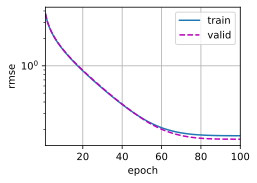

In [ ]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

# 折1，训练log rmse0.170353, 验证log rmse0.156085
# 折2，训练log rmse0.162647, 验证log rmse0.192188
# 折3，训练log rmse0.164876, 验证log rmse0.168746
# 折4，训练log rmse0.168106, 验证log rmse0.154895
# 折5，训练log rmse0.163629, 验证log rmse0.183272
# 5-折验证: 平均训练log rmse: 0.165922, 平均验证log rmse: 0.171037

In [23]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'训练log rmse：{float(train_ls[-1]):f}')
    # 将网络应用于测试集。
    preds = net(test_features).detach().numpy()
    # 将其重新格式化以导出到Kaggle
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)

训练log rmse：0.162647


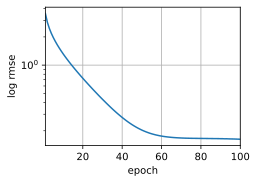

In [24]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

net = nn.Sequential(nn.Linear(20, 256), nn.ReLU(), nn.Linear(256, 10))

X = torch.rand(2, 20)
net(X)

# tensor([[-0.1872, -0.1808, -0.1497,  0.1599,  0.0088,  0.0825,  0.0188, -0.0162,
#           0.0198,  0.2531],
#         [-0.2003, -0.2229, -0.0521,  0.0796,  0.0037,  0.1122,  0.0405,  0.0164,
#           0.0241,  0.1052]], grad_fn=<AddmmBackward0>)

tensor([[-0.1872, -0.1808, -0.1497,  0.1599,  0.0088,  0.0825,  0.0188, -0.0162,
          0.0198,  0.2531],
        [-0.2003, -0.2229, -0.0521,  0.0796,  0.0037,  0.1122,  0.0405,  0.0164,
          0.0241,  0.1052]], grad_fn=<AddmmBackward0>)